# Testing Euristiche di Ricerca Locale
Presentazione dei risultati ottenuti dall'applicazione degli algoritmi implementati.

## Utilities
Importiamo i moduli contenenti le funzioni di nostro interesse:
- **utils**: funzioni per la lettura dei files e manipolazioni dei grafi;
- **solvers**: algoritmo di risoluzione Nearest Neighbour ed euristiche di ricerca locale con rispettive funzioni di supporto.

In [35]:
import utils
import solvers as sls
from tabulate import tabulate

In [2]:
loader = utils.Loader()
utl = utils.Utilities()
tsp = sls.TSP()

Utilizziamo il dataset **gil262**, caratterizzato dalle seguenti specifiche:

| field             | data                                  |
|------------------ |-----------------------------------	|
| NAME             	| gil262                            	|
| COMMENT          	| 262-city problem (Gillet/Johnson) 	|
| TYPE             	| TSP                               	|
| DIMENSION        	| 262                               	|
| EDGE_WEIGHT_TYPE 	| EUC_2D                            	|

Come tutte le istanze di nostro interesse si tratta di una istanza di TSP geometrico.


In [3]:
loader.readFile('TSP_datasets/gil262.tsp')
G = loader.createNxGraph()

## Nearest Neighbour (NN)
Dato il grafo G relativo alla istanza gil262:
- generiamo una soluzione ammissibile iniziale con NN;
- plottiamo la rappresentazione visiva del grafo NetworkX.

Execution time:  0.012951850891113281
Hamiltonian cost:  3241.4668367219524


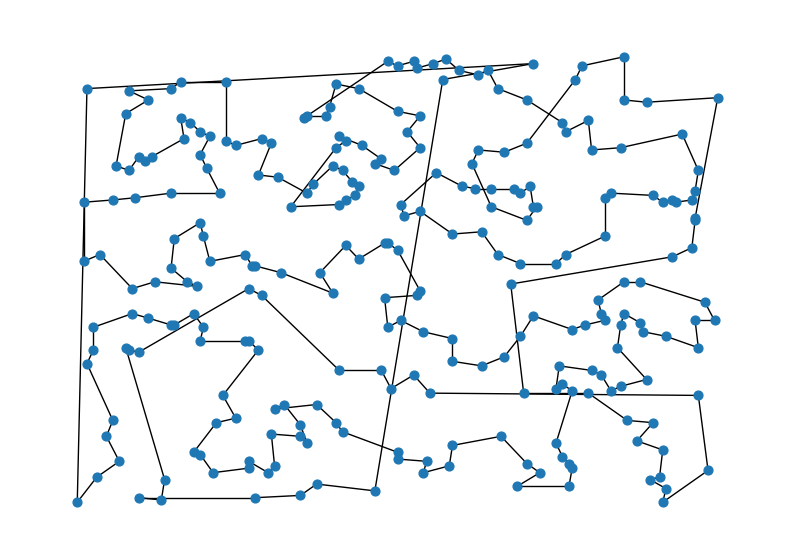

In [4]:
nn_time = tsp.NN(G)
nn_cost = tsp.hamiltonian_cost
H = tsp.toNetworkX(G)

print('Execution time: ', nn_time)
print('Hamiltonian cost: ', nn_cost)
utl.draw(H)

## Repeated Nearest Neighbour (RNN)
Eseguiamo NN utilizzando tutti i distinti nodi del grafo come starting-point.\
La differenziazione del nodo iniziale ci permette di ricavare la soluzione iniziale migliore in termini di costo.

Execution time:  12.326012372970581
Hamiltonian cost:  2883.6888569323537


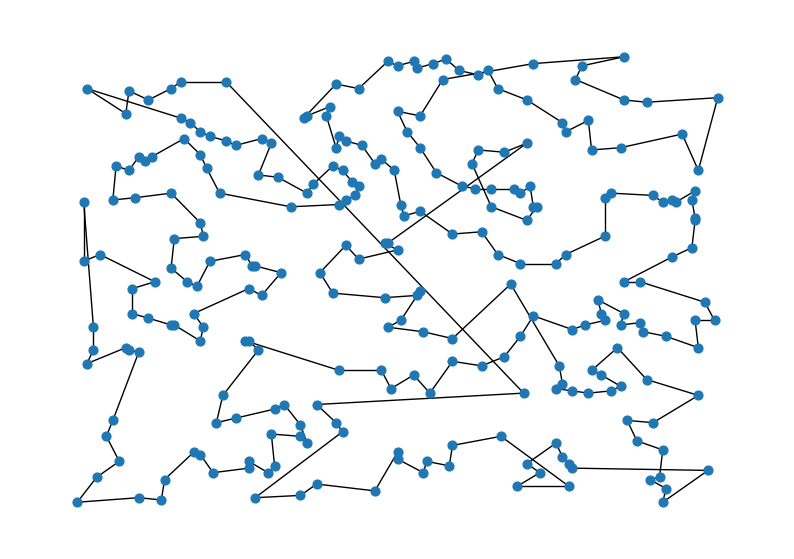

In [5]:
rnn_time = tsp.repNN(G)
rnn_cost = tsp.hamiltonian_cost
H = tsp.toNetworkX(G)

print('Execution time: ', rnn_time)
print('Hamiltonian cost: ', rnn_cost)
utl.draw(H)

## Euristiche di ricerca locale
Abbiamo visto:
- **Nearest Neighbour (NN)**, risultato ottenuto con l'algoritmo NN;
- **Repeated Nearest Neighbour (RNN)**, risultato migliore ottenuto con l'esecuzione ripetuta di NN;

Segue l'analisi dei risultati ricavati a partire dall'utilizzo delle euristiche di ricerca locale.
Per ogni euristica di ricerca locale **LS** (2-Opt e 3-Opt) valutiamo le seguenti configurazioni:
- **NN+LS**, risultato dell'applicazione di LS ad una soluzione ottenuta con NN;
- **RNN+LS**, risultato dell'applicazione di LS ad una soluzione ottenuta con RNN;
- **NN+LS+DLB**, risultato dell'applicazione di LS ad una soluzione ottenuta con NN sfruttando DLB;
- **RNN+LS+DLB**, risultato dell'applicazione di LS ad una soluzione ottenuta con RNN sfruttando DLB.


Con 'DLB' si intende l'utilizzo dei flag Don't Look Back (DLB) per filtrare i nodi di cui vogliamo tenere conto e quelli che é opportuno scartare per velocizzare l'esecuzione.\
I risultati sono particolarmente apprezzabili su istanze di TSP di dimensione importante.

In [6]:
stats_2Opt = []
stats_3Opt = []

### 2-Opt

#### NN + 2-Opt 

Execution time:  1.592599868774414
Hamiltonian cost:  2578.1309290487807


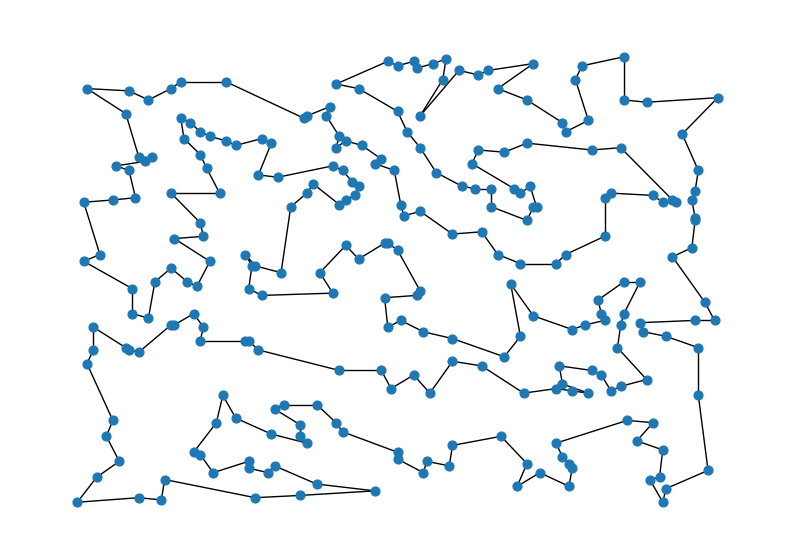

In [7]:
NN2Opt_time = tsp.NN2Opt(G)
NN2Opt_cost = tsp.hamiltonian_cost
H = tsp.toNetworkX(G)

print('Execution time: ', NN2Opt_time)
print('Hamiltonian cost: ', NN2Opt_cost)
utl.draw(H)

#### RNN + 2-Opt

Execution time:  13.702434062957764
Hamiltonian cost:  2568.625368138933


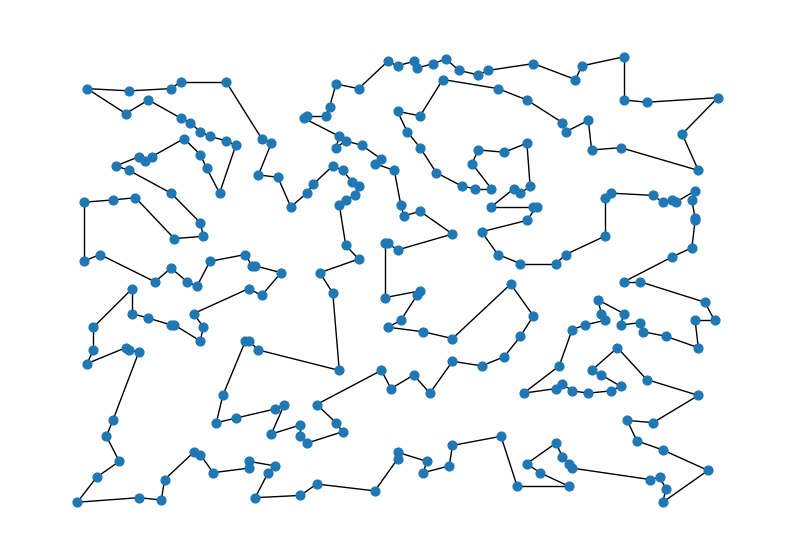

In [8]:
RNN2Opt_time = tsp.NN2Opt(G, True)
RNN2Opt_cost = tsp.hamiltonian_cost
H = tsp.toNetworkX(G)

print('Execution time: ', RNN2Opt_time)
print('Hamiltonian cost: ', RNN2Opt_cost)
utl.draw(H)

#### NN + 2-Opt + DLB

Execution time:  0.05675530433654785
Hamiltonian cost:  2634.5029524476963


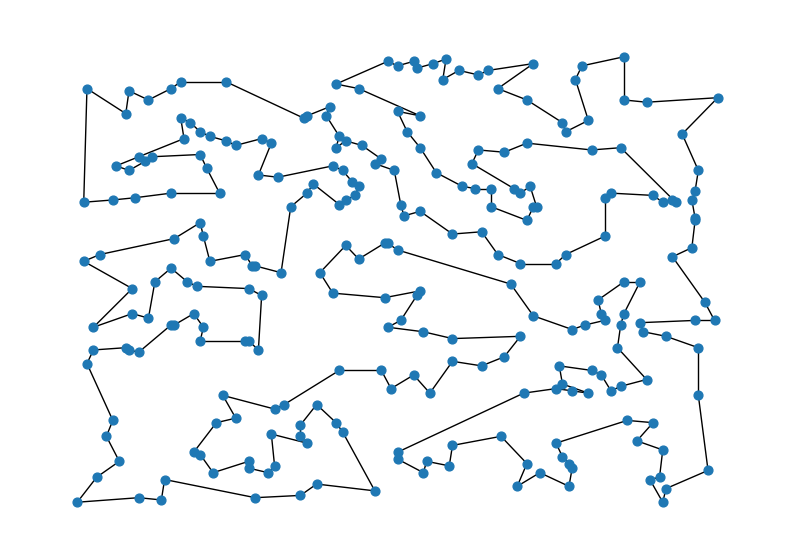

In [9]:
NN2Opt_DLB_time = tsp.NN2Opt(G, False, True)
NN2Opt_DLB_cost = tsp.hamiltonian_cost
H = tsp.toNetworkX(G)

print('Execution time: ', NN2Opt_DLB_time)
print('Hamiltonian cost: ', NN2Opt_DLB_cost)
utl.draw(H)

#### RNN + 2-Opt + DLB

Execution time:  12.669500589370728
Hamiltonian cost:  2606.090613552781


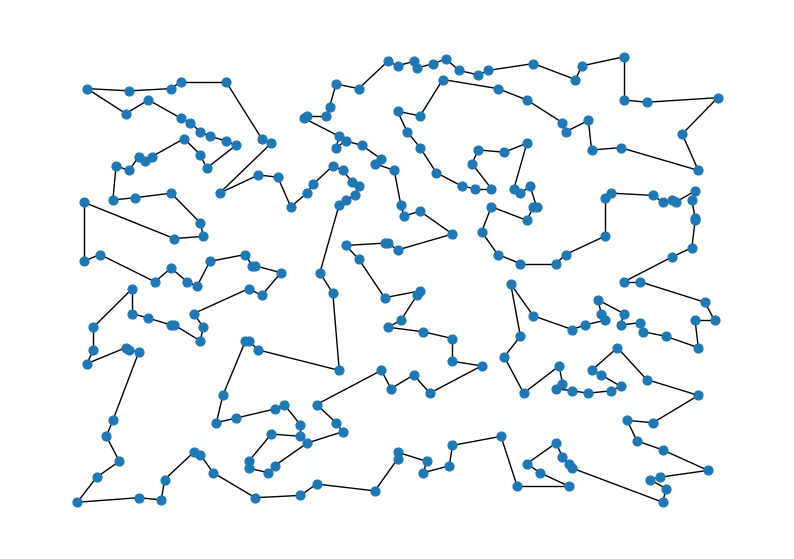

In [10]:
RNN2Opt_DLB_time = tsp.NN2Opt(G, True, True)
RNN2Opt_DLB_cost = tsp.hamiltonian_cost
H = tsp.toNetworkX(G)

print('Execution time: ', RNN2Opt_DLB_time)
print('Hamiltonian cost: ', RNN2Opt_DLB_cost)
utl.draw(H)

### 3-Opt

#### NN + 3-Opt

Execution time:  736.8276870250702
Hamiltonian cost:  2482.8589717957198


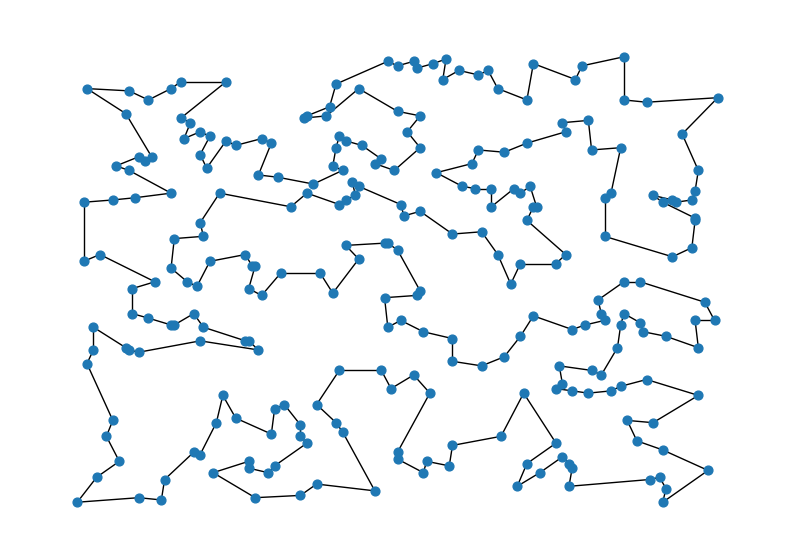

In [11]:
NN3Opt_time = tsp.NN3Opt(G)
NN3Opt_cost = tsp.hamiltonian_cost
H = tsp.toNetworkX(G)

print('Execution time: ', NN3Opt_time)
print('Hamiltonian cost: ', NN3Opt_cost)
utl.draw(H)

#### RNN + 3-Opt

Execution time:  365.4018933773041
Hamiltonian cost:  2505.272971723741


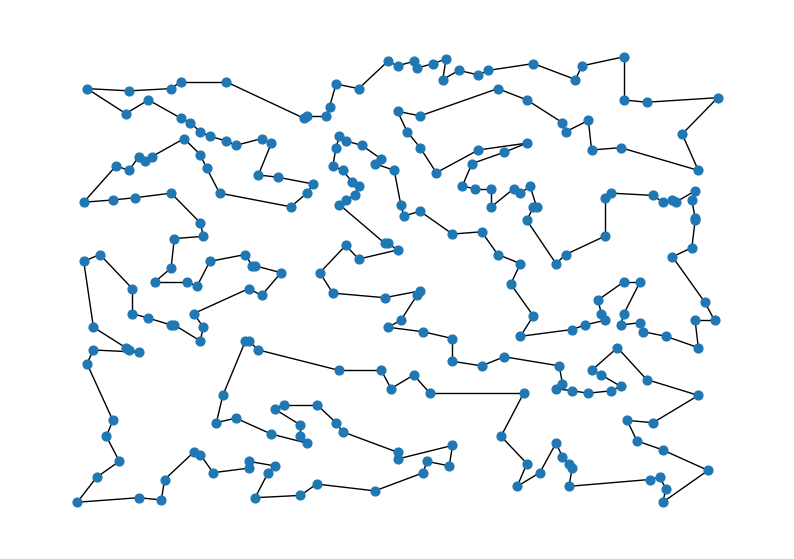

In [12]:
RNN3Opt_time = tsp.NN3Opt(G,True)
RNN3Opt_cost = tsp.hamiltonian_cost
H = tsp.toNetworkX(G)

print('Execution time: ', RNN3Opt_time)
print('Hamiltonian cost: ', RNN3Opt_cost)
utl.draw(H)

#### NN + 3-Opt + DLB

Execution time:  77.56369495391846
Hamiltonian cost:  2482.892468060726


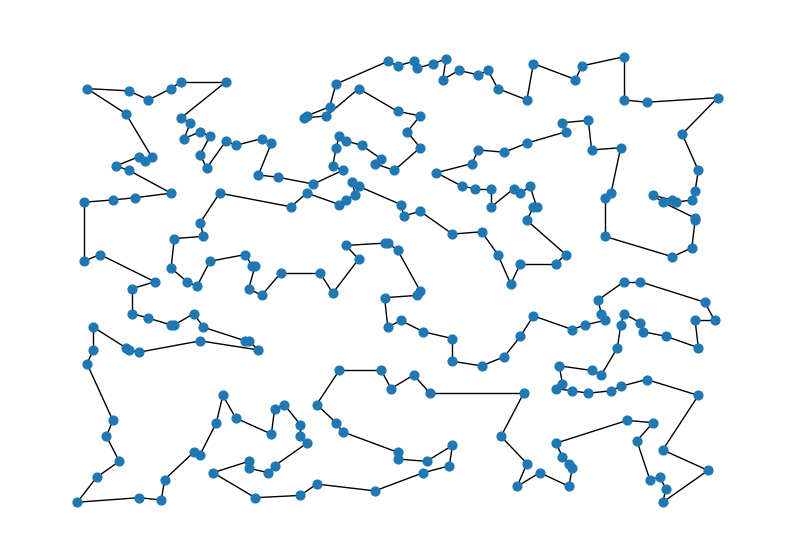

In [13]:
NN3Opt_DLB_time = tsp.NN3Opt(G, False, True)
NN3Opt_DLB_cost = tsp.hamiltonian_cost
H = tsp.toNetworkX(G)

print('Execution time: ', NN3Opt_DLB_time)
print('Hamiltonian cost: ', NN3Opt_DLB_cost)
utl.draw(H)

#### RNN + 3-Opt + DLB

Execution time:  81.70368003845215
Hamiltonian cost:  2507.55805314865


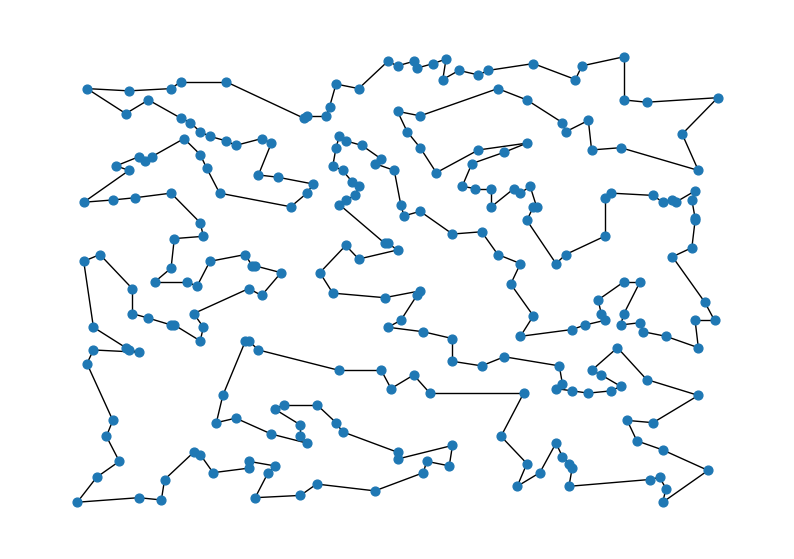

In [14]:
RNN3Opt_DLB_time = tsp.NN3Opt(G, True, True)
RNN3Opt_DLB_cost = tsp.hamiltonian_cost
H = tsp.toNetworkX(G)

print('Execution time: ', RNN3Opt_DLB_time)
print('Hamiltonian cost: ', RNN3Opt_DLB_cost)
utl.draw(H)

## Analisi dei risultati

In [36]:
stats_2Opt.append((NN2Opt_time, NN2Opt_cost))
stats_2Opt.append((RNN2Opt_time, RNN2Opt_cost))
stats_2Opt.append((NN2Opt_DLB_time, NN2Opt_DLB_cost))
stats_2Opt.append((RNN2Opt_DLB_time, RNN2Opt_DLB_cost))

stats_3Opt.append((NN3Opt_time, NN3Opt_cost))
stats_3Opt.append((RNN3Opt_time, RNN3Opt_cost))
stats_3Opt.append((NN3Opt_DLB_time, NN3Opt_DLB_cost))
stats_3Opt.append((RNN3Opt_DLB_time, RNN3Opt_DLB_cost))

In [39]:
headers = [' ', '2-Opt Time', '2-Opt Cost', '3-Opt Time', '3-Opt Cost']
labels = ['NN', 'RNN', 'NN+DLB', 'RNN+DLB']

def print_stats(labels, headers, stats1, stats2):
    statistics = list(zip(labels,stats1, stats2))
    tabulated_data = []
    for label, tuple1, tuple2 in statistics:
        row = [label] + list(tuple1) + list(tuple2)
        tabulated_data.append(row)

    table = tabulate(tabulated_data, headers=headers, tablefmt='pretty')
    print(table)

In [40]:
print('NN:  ', nn_time, nn_cost)
print('RNN: ', rnn_time, rnn_cost)
print_stats(labels, headers, stats_2Opt, stats_3Opt)

NN:   0.012951850891113281 3241.4668367219524
RNN:  12.326012372970581 2883.6888569323537
+---------+---------------------+--------------------+-------------------+--------------------+
|         |     2-Opt Time      |     2-Opt Cost     |    3-Opt Time     |     3-Opt Cost     |
+---------+---------------------+--------------------+-------------------+--------------------+
|   NN    |  1.592599868774414  | 2578.1309290487807 | 736.8276870250702 | 2482.8589717957198 |
|   RNN   | 13.702434062957764  | 2568.625368138933  | 365.4018933773041 | 2505.272971723741  |
| NN+DLB  | 0.05675530433654785 | 2634.5029524476963 | 77.56369495391846 | 2482.892468060726  |
| RNN+DLB | 12.669500589370728  | 2606.090613552781  | 81.70368003845215 |  2507.55805314865  |
+---------+---------------------+--------------------+-------------------+--------------------+


Osserviamo che il tempo impiegato da 3-Opt rispecchia la complessitá dell'euristica.\
Il migliore risultato ottenuto in assoluto é dato da **NN + 3-Opt + DLB** con costo **2482.892** eseguito in circa **1.30min**.\
Il risultato ottenuto con 2-Opt che piú si avvicina é **RNN + 2-Opt** con costo **2634.503** eseguito in **13.7s**.

Dunque 3-Opt ha permesso un guadagno di:

In [47]:
gain = (2482.892 - 2634.503) / 2634.503 * 100
print(gain, '%')

-5.754823585321418 %


impiegando peró in piú rispetto a 2-Opt in termini di tempo di esecuzione:

In [49]:
time_delta = (77.567 - 13.702) / 13.702 * 100
print(time_delta, '%')

466.0998394394978 %


Un guadagno del 5.75% al costo del 466% in piú di tempo di esecuzione non é conveniente a meno che il task richieda ad ogni costo il massimo livello di precisione possibile nell'ottimizzazione del ciclo hamiltoniano.\
É comprensibile il motivo per cui non ci si sia mai spinti oltre al 5-Opt dato l'aumento di complessitá al crecere di k.